<a href="https://colab.research.google.com/github/mattabott/E_commerce_analysis/blob/main/E_commerce_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##E-Commerce Dataset analysis

The following dataset is from https://www.kaggle.com/carrie1/ecommerce-data and contain 2010/2011 sales.
In this notebook we analyze the data to show them on plot.

All the code below is written by mattabott (mattabott@gmail.com).

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test/Ecommerce_Kaggle/data.csv', delimiter=',',
                 nrows=None,
                 encoding='latin1')

In [175]:
df.head(-1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [177]:
#Drop customer id
df = df.drop(columns='CustomerID')

In [178]:
#Drop Nan data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   Country      540455 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 33.0+ MB


In [179]:
#change quantity from int to float and date from object to Datetime
df['Quantity'] = df.Quantity.astype(float)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  float64       
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 33.0+ MB


In [180]:
#New column with total price per product
df['tot_price'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,tot_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [181]:
print('Total earned: £', df['tot_price'].sum())

Total earned: £ 9747747.933999997


In [182]:
df_tot = df.groupby('InvoiceDate')['tot_price'].agg('sum').reset_index().sort_values('tot_price',ascending=False)

df_tot.head(10)

,InvoiceDate,tot_price
22271,2011-12-09 09:15:00,168469.60
2354,2011-01-18 10:01:00,77183.60
19063,2011-11-07 17:42:00,52940.94
19767,2011-11-14 17:55:00,50653.91
9820,2011-06-10 15:28:00,39597.40
15277,2011-09-20 11:05:00,31698.16
10059,2011-06-15 13:37:00,23426.81
17663,2011-10-21 12:08:00,22206.00
15270,2011-09-20 10:12:00,22104.80
13433,2011-08-18 08:51:00,21880.44


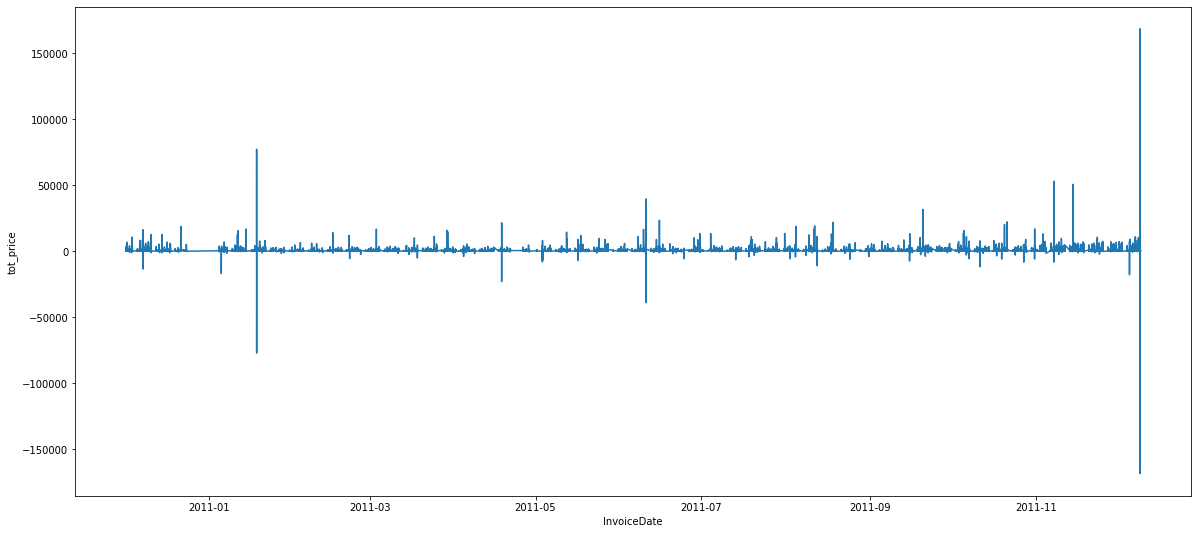

In [183]:
#Plot total £ earned
plt.figure(figsize=(20,9))
sns.lineplot(x='InvoiceDate', y='tot_price', data=df_tot)
plt.show()

In [184]:
#There are some 'wrong' data... some big earned have same value in minor, so there some refunds(?)
#Try to find some of them

print(df['tot_price'].idxmax()) #id of max value
print(df['tot_price'].idxmin()) #id of min value

540421
540422


In [185]:
#This means that the max and the minor value ar consequential
#Let's see what is the value for each

print(df['tot_price'].max())
print(df['tot_price'].min())

168469.6
-168469.6


In [186]:
#ok, same value... are there on same day? Let's check!
print(df._get_value(540421, 'InvoiceDate'))
print(df._get_value(540422, 'InvoiceDate'))

2011-12-09 09:15:00
2011-12-09 09:27:00


In [211]:
#Try to 'erase' these data 

df_mod = df.copy()
df_mod.set_index('InvoiceDate', inplace=True)
df_mod = df_mod.groupby(df_mod.index.date)['tot_price'].agg('sum').reset_index()
df_mod['index']=pd.to_datetime(df_mod['index'])
df_mod.set_index('index', inplace=True)
df_mod.head()

,tot_price
index,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-05,31383.95
2010-12-06,53860.18


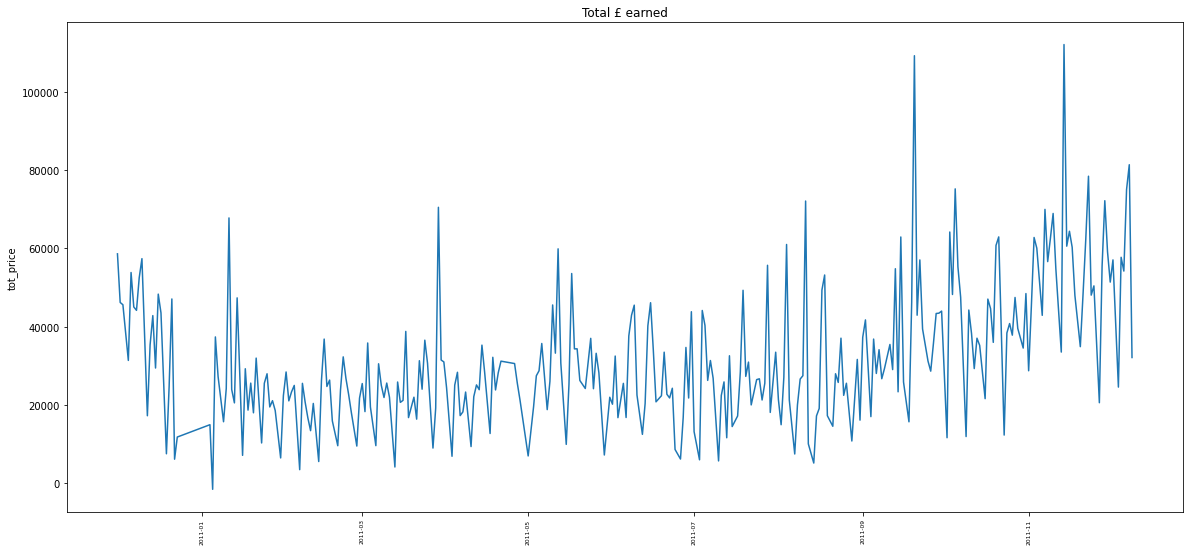

In [213]:
#Plot 'real' data
plt.figure(figsize=(20,9))
plt.title('Total £ earned')
sns.lineplot(x=df_mod.index.date,y='tot_price' ,data=df_mod)
plt.xticks(rotation=90, fontsize=6)
plt.show()

In [214]:
#Most sell products
df_most_sell = df.groupby(['Description','Country'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=False)

df_most_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20176 entries, 19628 to 20120
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  20176 non-null  object 
 1   Country      20176 non-null  object 
 2   Quantity     20176 non-null  float64
dtypes: float64(1), object(2)
memory usage: 630.5+ KB


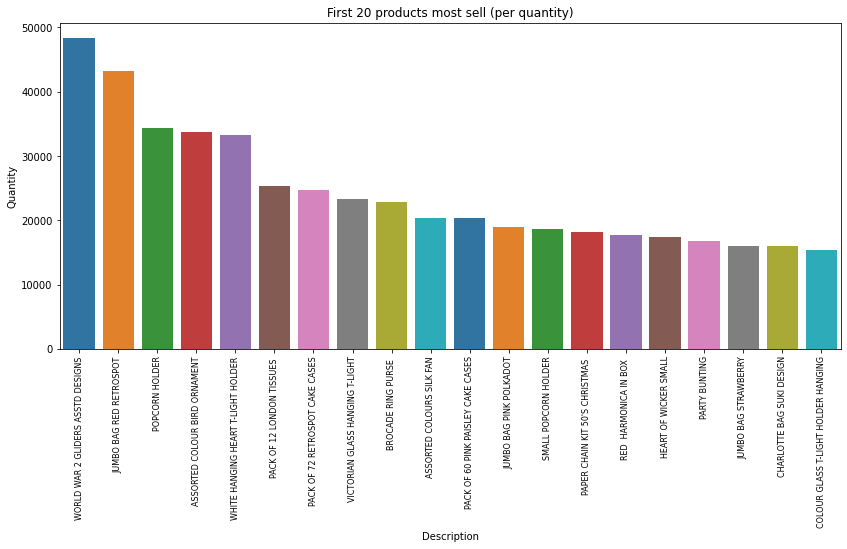

In [215]:
#Print first 20 most sell products
plt.figure(figsize=(14,6))
plt.title('First 20 products most sell (per quantity)')
sns.barplot(x=df_most_sell['Description'][:20], y='Quantity', data=df_most_sell, palette='tab10')
plt.xticks(rotation=90, fontsize=8)
plt.show()

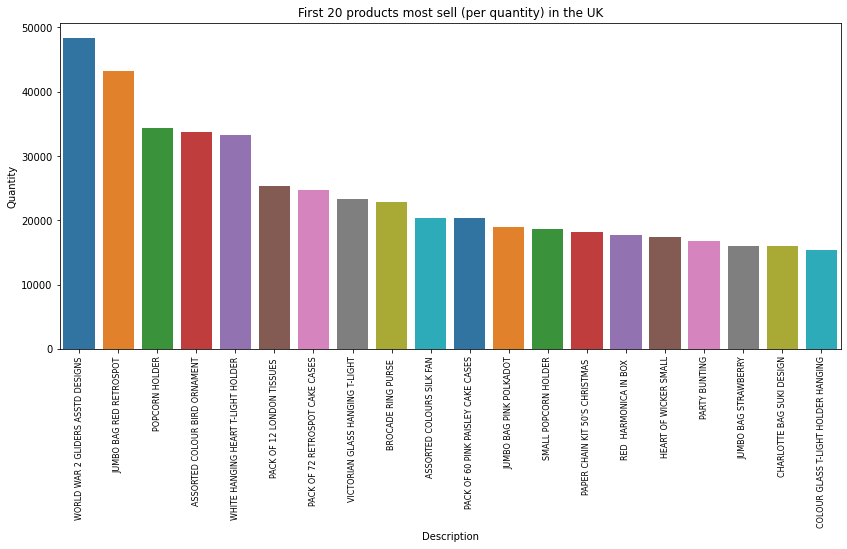

In [216]:
#Print first 20 most sell products in UK
plt.figure(figsize=(14,6))
plt.title('First 20 products most sell (per quantity) in the UK')
sns.barplot(x=df_most_sell['Description'][:20], y='Quantity', data=df_most_sell[df_most_sell['Country']=='United Kingdom'], palette='tab10')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [218]:
#Most gain products
df_most_gain = df.groupby(['Description','Country'])['tot_price'].agg('sum').reset_index().sort_values('tot_price', ascending=False)

df_most_gain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20176 entries, 5098 to 960
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  20176 non-null  object 
 1   Country      20176 non-null  object 
 2   tot_price    20176 non-null  float64
dtypes: float64(1), object(2)
memory usage: 630.5+ KB


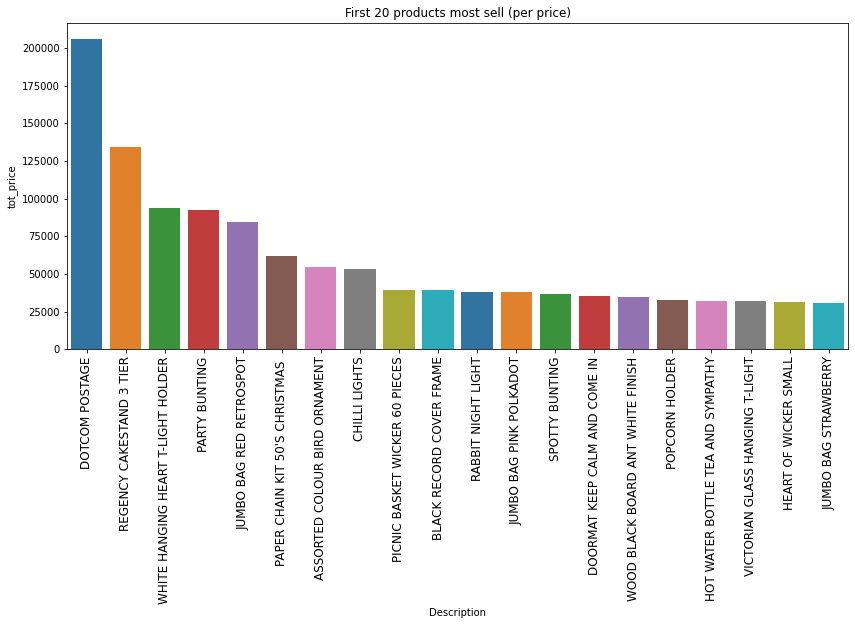

In [219]:
#Print first 20 most gain products
plt.figure(figsize=(14,6))
plt.title('First 20 products most sell (per price)')
sns.barplot(x=df_most_gain['Description'][:20], y='tot_price', data=df_most_gain, palette='tab10')
plt.xticks(rotation=90, fontsize=12)
plt.show()

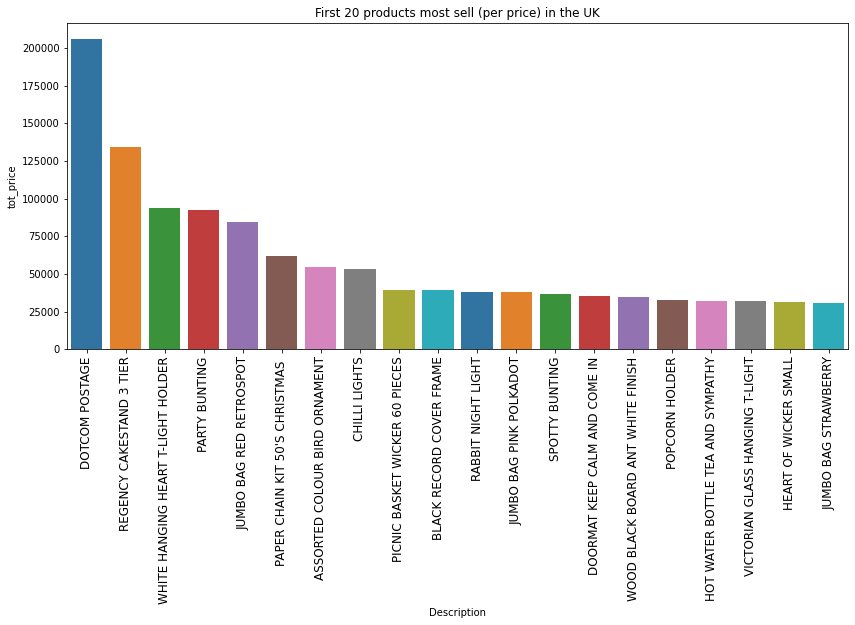

In [220]:
#Print first 20 most gain products in the UK
plt.figure(figsize=(14,6))
plt.title('First 20 products most sell (per price) in the UK')
sns.barplot(x=df_most_gain['Description'][:20], y='tot_price', data=df_most_gain[df_most_gain['Country']=='United Kingdom'], palette='tab10')
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [221]:
#Search in the country sell
df_country = df.groupby('Country')['tot_price'].agg('sum').reset_index().sort_values('tot_price',ascending=False)

df_country.head(10)
#df_country.info()

,Country,tot_price
36,United Kingdom,8.187806e+06
24,Netherlands,2.846615e+05
10,EIRE,2.632768e+05
14,Germany,2.216982e+05
13,France,1.974039e+05
0,Australia,1.370773e+05
33,Switzerland,5.638535e+04
31,Spain,5.477458e+04
3,Belgium,4.091096e+04
32,Sweden,3.659591e+04


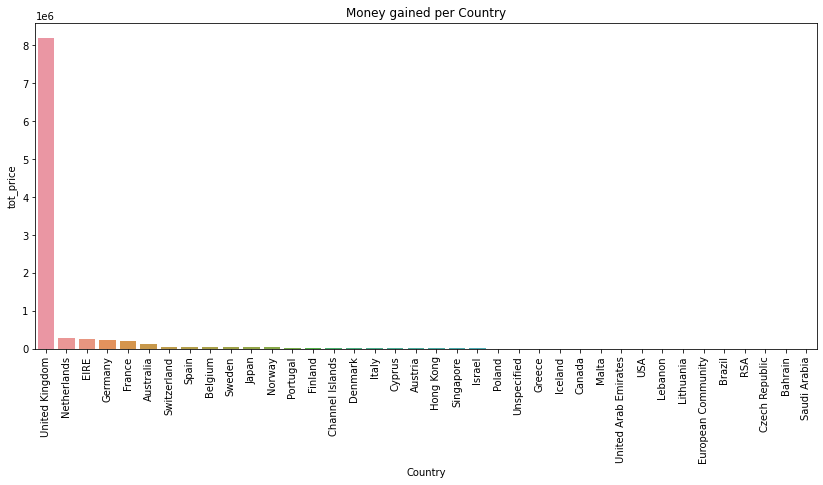

In [222]:
#Plot money per country
plt.figure(figsize=(14,6))
plt.title('Money gained per Country')
sns.barplot(x=df_country['Country'], y=df_country['tot_price'], data=df_country)
plt.xticks(rotation=90)

plt.show()

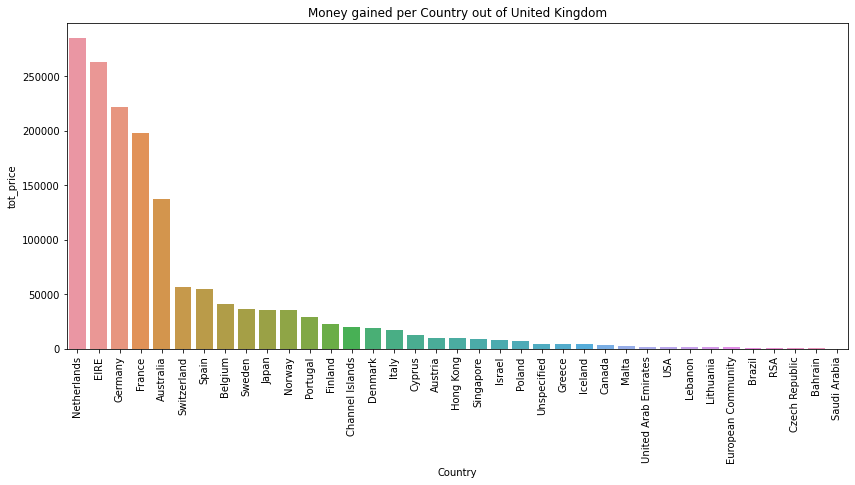

In [223]:
#Dataset is from UK, so let's see what happend out of it
plt.figure(figsize=(14,6))
plt.title('Money gained per Country out of United Kingdom')
sns.barplot(x=df_country['Country'][1:], y=df_country['tot_price'], data=df_country)
plt.xticks(rotation=90)

plt.show()

In [224]:
#See most sell product for specific Country (Italy for example)
df_italy = df[df['Country']=='Italy']

#df_italy.head()
df_italy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 7214 to 529693
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    803 non-null    object        
 1   StockCode    803 non-null    object        
 2   Description  803 non-null    object        
 3   Quantity     803 non-null    float64       
 4   InvoiceDate  803 non-null    datetime64[ns]
 5   UnitPrice    803 non-null    float64       
 6   Country      803 non-null    object        
 7   tot_price    803 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 56.5+ KB


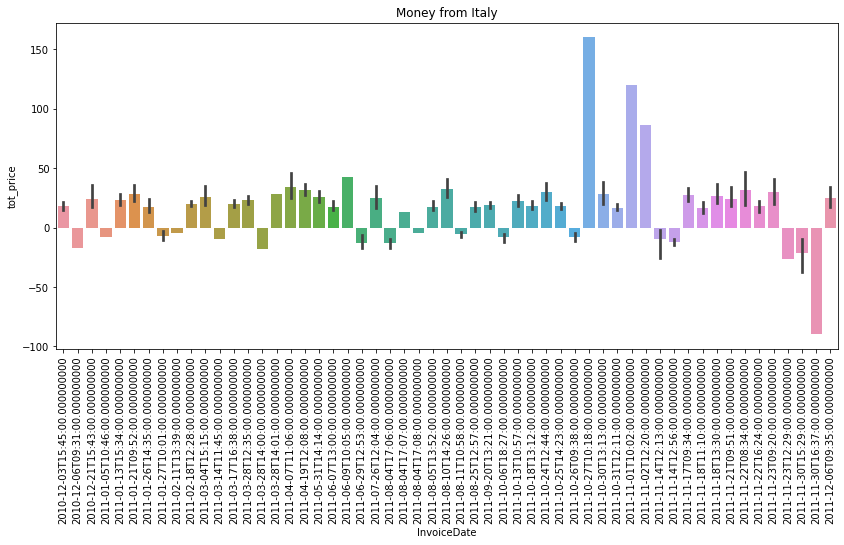

In [225]:
plt.figure(figsize=(14,6))
plt.title('Money from Italy')
sns.barplot(x=df_italy['InvoiceDate'], y=df_italy['tot_price'], data=df_italy)
plt.xticks(rotation=90)

plt.show()

In [226]:
#In dataset we can see that there are some minus money, so let's check it
tot_italy = 0
min_italy = 0
for i in df_italy['tot_price']:
  tot_italy = tot_italy + i
  if i <0:
    min_italy = min_italy + i
print('Total gained by Italians:','£','{:.2f}'.format(tot_italy))
print('Total refund by Italians:','£','{:.2f}'.format(min_italy))

Total gained by Italians: £ 16890.51
Total refund by Italians: £ -592.73


In [227]:
#Try to drop minus data to have a better seen of the data
df_italy_mod= df_italy[df_italy['Quantity']>0]

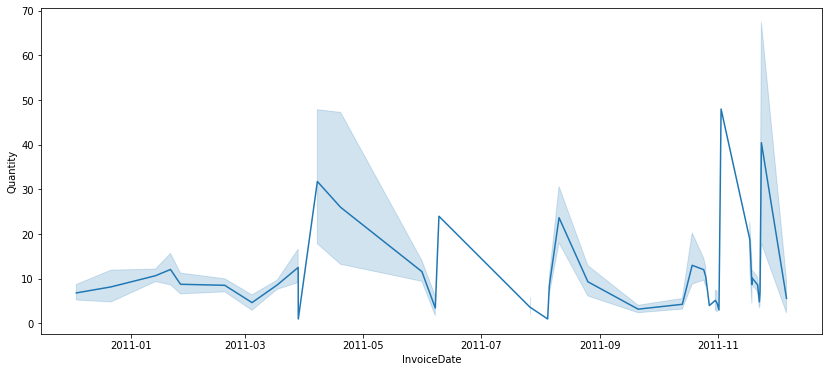

In [228]:
plt.figure(figsize=(14,6))
sns.lineplot(x='InvoiceDate', y='Quantity', data=df_italy_mod)

plt.show()

In [229]:
#Let's see some country stats
df_country_mod = df.groupby(['InvoiceDate', 'Country'])['tot_price'].agg('sum').reset_index()
df_country_mod.set_index('InvoiceDate', inplace=True)
df_country_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22650 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    22650 non-null  object 
 1   tot_price  22650 non-null  float64
dtypes: float64(1), object(1)
memory usage: 530.9+ KB


In [230]:
#First semester
df_first = df_country_mod.loc['2011-01':'2011-05']

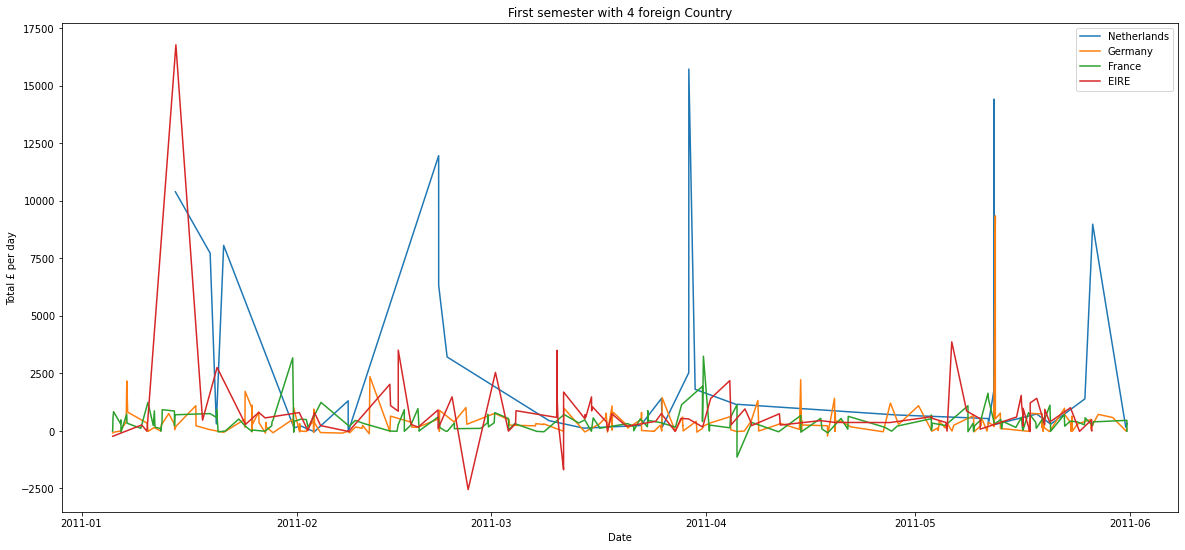

In [231]:
plt.figure(figsize=(20,9))
plt.title('First semester with 4 foreign Country')
sns.lineplot(x='InvoiceDate', y='tot_price',
             data=df_first[df_first['Country']=='Netherlands'], label='Netherlands')
sns.lineplot(x='InvoiceDate', y='tot_price',
             data=df_first[df_first['Country']=='Germany'], label='Germany')
sns.lineplot(x='InvoiceDate', y='tot_price',
             data=df_first[df_first['Country']=='France'], label='France')
sns.lineplot(x='InvoiceDate', y='tot_price',
             data=df_first[df_first['Country']=='EIRE'], label='EIRE')

plt.xlabel('Date')
plt.ylabel('Total £ per day')
plt.legend()
plt.show()

In [232]:
#Genuary
df_gen = df_country_mod.loc['2011-01']

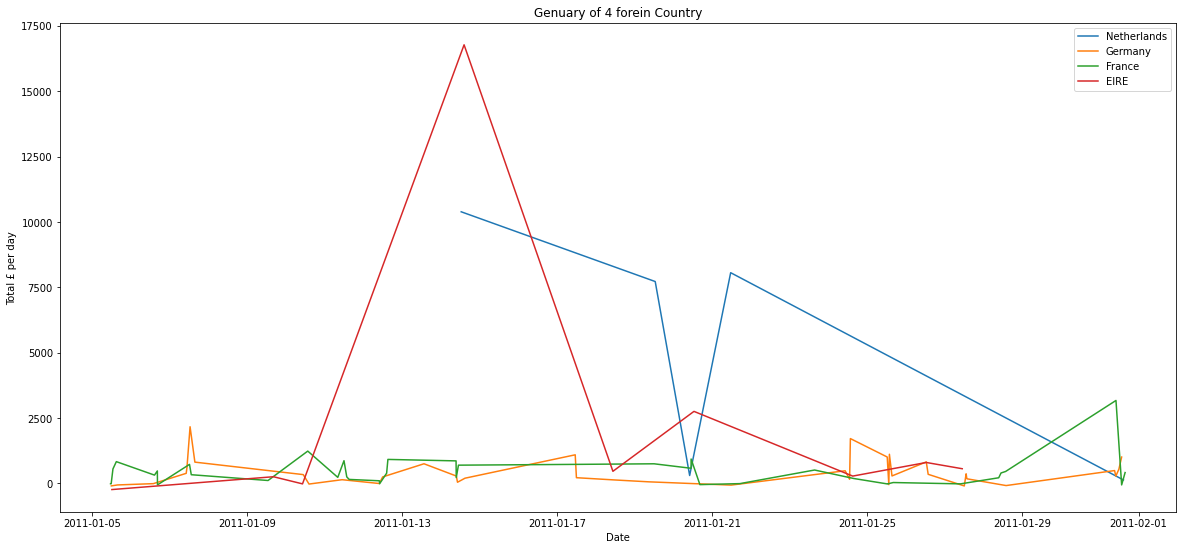

In [233]:
plt.figure(figsize=(20,9))
plt.title('Genuary of 4 forein Country')
sns.lineplot(x='InvoiceDate', y='tot_price',
             data=df_gen[df_gen['Country']=='Netherlands'], label='Netherlands')
sns.lineplot(x='InvoiceDate', y='tot_price',
             data=df_gen[df_gen['Country']=='Germany'], label='Germany')
sns.lineplot(x='InvoiceDate', y='tot_price',
             data=df_gen[df_gen['Country']=='France'], label='France')
sns.lineplot(x='InvoiceDate', y='tot_price',
             data=df_gen[df_gen['Country']=='EIRE'], label='EIRE')

plt.xlabel('Date')
plt.ylabel('Total £ per day')
plt.legend()
plt.show()

In [234]:
#What about UK Genuary?!
df_gen_uk = df_gen.groupby(df_gen.index.date).count()
df_gen_uk.drop(columns='Country', inplace=True)
df_gen_uk

,tot_price
2011-01-04,43
2011-01-05,70
2011-01-06,75
2011-01-07,54
2011-01-09,48
2011-01-10,50
2011-01-11,75
2011-01-12,59
2011-01-13,45
2011-01-14,54


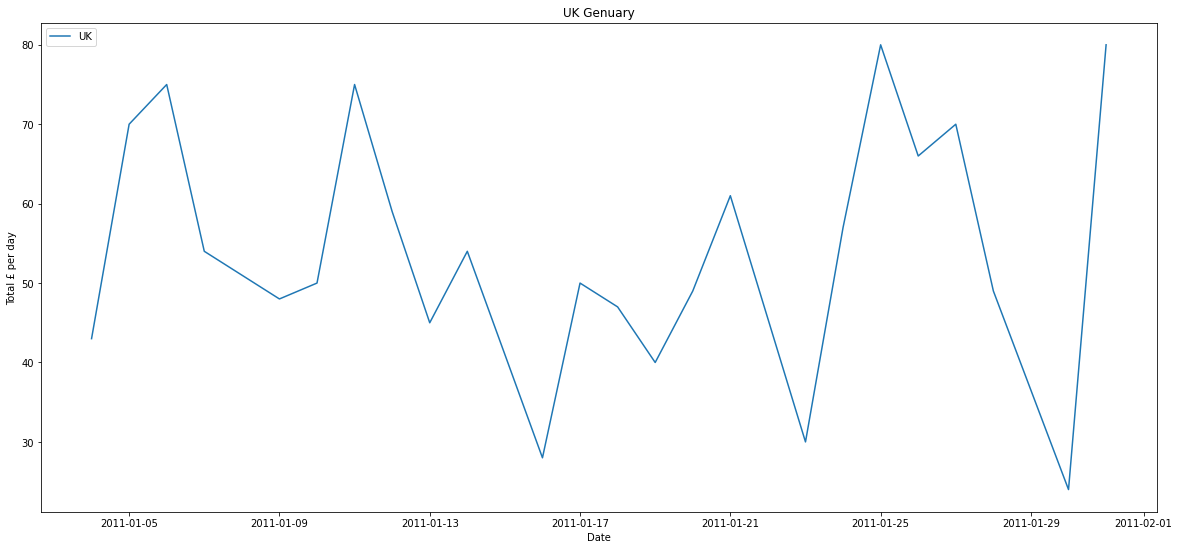

In [235]:
plt.figure(figsize=(20,9))
plt.title('UK Genuary')
sns.lineplot(x=df_gen_uk.index, y='tot_price',
             data=df_gen_uk, label='UK')

plt.xlabel('Date')
plt.ylabel('Total £ per day')
plt.legend()
plt.show()

In [236]:
#Mod data to see sum of single Country in unique plot
df_all_Country = df_country_mod.groupby([df_country_mod.index.date, 'Country','tot_price']).count()
df_all_Country.reset_index(inplace=True)
df_all_Country.rename(columns={'level_0':'date'}, inplace=True)
df_all_Country

,date,Country,tot_price
0,2010-12-01,Australia,358.25
1,2010-12-01,EIRE,555.38
2,2010-12-01,France,855.86
3,2010-12-01,Germany,-122.30
4,2010-12-01,Germany,261.48
...,...,...,...
22138,2011-12-09,United Kingdom,1802.87
22139,2011-12-09,United Kingdom,3217.20
22140,2011-12-09,United Kingdom,5664.89
22141,2011-12-09,United Kingdom,7689.23


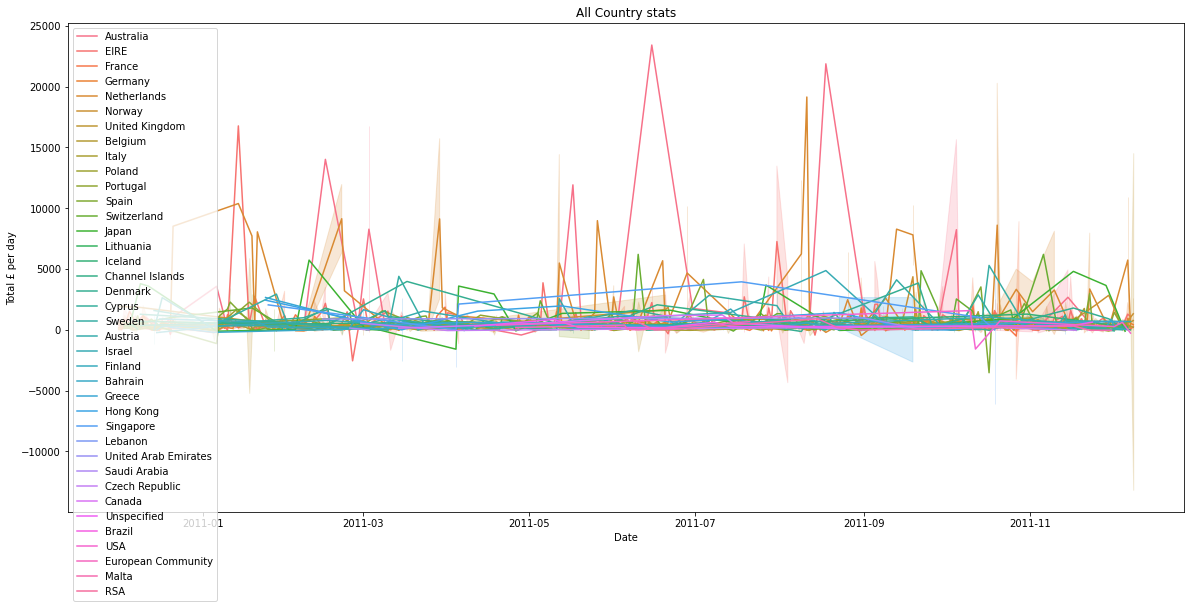

In [237]:
plt.figure(figsize=(20,9))
plt.title('All Country stats')
sns.lineplot(x='date', y='tot_price', hue='Country' ,data=df_all_Country)
plt.xlabel('Date')
plt.ylabel('Total £ per day')
plt.legend()
plt.show()